In [98]:
import pandas as pd
import sklearn.model_selection as skl_ms
import numpy as np
import sklearn.ensemble as skl_e
import matplotlib.pyplot as plt
import scipy.stats as scp_s

In [10]:
# File locations
ws = "C:/Users/User/Documents/Workspace/NFL_Goldmine/Data/"
f1 = "NFL_2018_2021.csv"
f2 = "2_week_avg.csv"
f3 = "3_week_avg.csv"
f4 = "4_week_avg.csv"

In [101]:
def get_two_week_average(df_data):

    df = pd.DataFrame()

    for team in df_data['Tm'].sort_values().unique():
        for year in df_data['Year'].sort_values().unique():
            df_ex = df_data[(df_data['Tm'] == team) & (df_data['Year'] == year)].sort_values('Week').reset_index().drop(columns = 'index')
            for row in range(0,len(df_ex.index)-2):
                avg_rows = df_ex[(df_ex.index == row) | (df_ex.index == row + 1)] 
                keep_columns = ['Year','Week','Tm','QB','Passer_Rating']
                df_keep = df_ex[df_ex.index == row + 2][keep_columns].reset_index().drop(columns = 'index')
                df_avg = avg_rows.drop(columns = ['Year','Week','Tm','QB','Passer_Rating'])
                df_averages = pd.DataFrame(df_avg.mean()).transpose().reset_index().drop(columns = 'index')
                df_averages = round(df_averages,2)
                df_averages = df_averages.add_prefix('Avg_')
                df_final = pd.concat([df_keep,df_averages],axis = 1)
                df = df.append(df_final)
                
    return df

def get_three_week_average(df_data):

    df = pd.DataFrame()

    for team in df_data['Tm'].sort_values().unique():
        for year in df_data['Year'].sort_values().unique():
            df_ex = df_data[(df_data['Tm'] == team) & (df_data['Year'] == year)].sort_values('Week').reset_index().drop(columns = 'index')
            for row in range(0,len(df_ex.index)-3):
                avg_rows = df_ex[(df_ex.index == row) | (df_ex.index == row + 1) | (df_ex.index == row + 2)] 
                keep_columns = ['Year','Week','Tm','QB','Passer_Rating']
                df_keep = df_ex[df_ex.index == row + 3][keep_columns].reset_index().drop(columns = 'index')
                df_avg = avg_rows.drop(columns = ['Year','Week','Tm','QB','Passer_Rating'])
                df_averages = pd.DataFrame(df_avg.mean()).transpose().reset_index().drop(columns = 'index')
                df_averages = round(df_averages,2)
                df_averages = df_averages.add_prefix('Avg_')
                df_final = pd.concat([df_keep,df_averages],axis = 1)
                df = df.append(df_final)
    
    return df

def get_four_week_average(df_data):

    df = pd.DataFrame()

    for team in df_data['Tm'].sort_values().unique():
        for year in df_data['Year'].sort_values().unique():
            df_ex = df_data[(df_data['Tm'] == team) & (df_data['Year'] == year)].sort_values('Week').reset_index().drop(columns = 'index')
            for row in range(0,len(df_ex.index)-4):
                avg_rows = df_ex[(df_ex.index == row) | (df_ex.index == row + 1) | 
                                 (df_ex.index == row + 2) | (df_ex.index == row + 3)] 
                keep_columns = keep_columns = ['Year','Week','Tm','QB','Passer_Rating']
                df_keep = df_ex[df_ex.index == row + 4][keep_columns].reset_index().drop(columns = 'index')
                df_avg = avg_rows.drop(columns = ['Year','Week','Tm','QB','Passer_Rating'])
                df_averages = pd.DataFrame(df_avg.mean()).transpose().reset_index().drop(columns = 'index')
                df_averages = round(df_averages,2)
                df_averages = df_averages.add_prefix('Avg_')
                df_final = pd.concat([df_keep,df_averages],axis = 1)
                df = df.append(df_final)
    
    return df

In [43]:
qbr_2 = get_two_week_average(all_df[["Year", "Week", "Tm", "QB", "Passer_Rating"]])

In [25]:
all_df = pd.read_csv(ws + f1)

In [26]:
all_df.head()

,Year,Week,Tm,Opp,Home/Away,Score,Opp_Score,W/L,Pass_Cmp,Pass_Att,...,Def_QBKD,Def_Prss,Def_Comb,Def_MTkl,Def_ADOT,Def_Cmp%,Def_Yds/Cmp,Def_Yds/Tgt,Def_Missed_Tkl%,is_home
0,2018,1,ATL,PHI,Away,12,18,0,21,43,...,2,9,53,6,9.44,50.0,6.65,3.32,10.0,0
1,2019,2,ATL,PHI,Home,24,20,1,27,43,...,4,15,55,3,8.88,61.0,9.10,5.53,5.0,1
2,2021,1,ATL,PHI,Home,6,32,0,21,35,...,1,6,52,2,3.13,87.0,9.78,8.52,4.0,1
3,2020,5,PIT,PHI,Home,38,29,1,27,34,...,5,16,47,7,13.50,59.0,13.25,7.79,13.0,1
4,2020,11,CLE,PHI,Home,22,17,1,12,22,...,6,16,55,8,7.06,60.0,11.19,6.71,13.0,1


In [106]:
def make_prediction_model(df, qbr_df):
    df = df.merge(qbr_df)
    df = df.drop(["Year", "Week", "Tm", "Opp", "Home/Away", "QB", "Opp_QB"], axis = 1)
    train, test = skl_ms.train_test_split(df, train_size = 0.75, random_state = 212121)
    
    train_feat = train.drop(["Score"], axis = 1)
    train_val  = train.Score

    test_feat = test.drop(["Score"], axis = 1)
    test_val  = test.Score
    
    baseline_preds = [train_val.mean()] * len(train_val)
    
    errors = train_val - baseline_preds
    print(abs(errors).mean())
    print(scp_s.pearsonr(train_val, baseline_preds))
    
    rf = skl_e.RandomForestRegressor(n_estimators = 100, random_state = 212121)
    rf.fit(train_feat, train_val)

    preds_rf  = rf.predict(test_feat)
    errors_rf = preds_rf - test_val
    
    print(abs(errors_rf).mean())
    print(scp_s.pearsonr(test_val, preds_rf))

In [107]:
f2_dt = pd.read_csv(ws + f2)
make_prediction_model(f2_dt, qbr_2)

8.349732610033858
(nan, nan)


C:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


6.1572149122807005
(0.6140857500936214, 1.3065882029612816e-48)


In [108]:
f3_dt = pd.read_csv(ws + f3)
qbr_3 = get_three_week_average(all_df[["Year", "Week", "Tm", "QB", "Passer_Rating"]])
make_prediction_model(f3_dt, qbr_3)

8.097161653020056
(nan, nan)


C:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


6.160966981132075
(0.7188279249284474, 1.2549216793923092e-68)


In [109]:
f4_dt = pd.read_csv(ws + f4)
qbr_4 = get_four_week_average(all_df[["Year", "Week", "Tm", "QB", "Passer_Rating"]])
make_prediction_model(f4_dt, qbr_4)

8.113005664212197
(nan, nan)


C:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


6.12074168797954
(0.6853283904436027, 1.5594816941699945e-55)


In [117]:
def make_ts_prediction_model(df, qbr, n_trees = 100):
    df = df.merge(qbr)
    df_1820 = df[df.Year != 2021]
    df_21   = df[df.Year == 2021]

    df_1820 = df_1820.drop(["Year", "Week", "Tm", "Opp", "Home/Away", "QB", "Opp_QB"], axis = 1) 
    df_21   = df_21.drop(["Year", "Week", "Tm", "Opp", "Home/Away", "QB", "Opp_QB"], axis = 1)
    df_1820_feat = df_1820.drop(["Score"], axis = 1)
    df_1820_val  = df_1820.Score

    df_21_feat = df_21.drop(["Score"], axis = 1)
    df_21_val = df_21.Score
    
    baseline_ts = [df_1820_val.mean()] * len(df_21_val)
    print(abs(df_21_val - baseline_ts).mean())
    
    rf_2_ts = skl_e.RandomForestRegressor(n_estimators = n_trees, random_state = 212121)
    rf_2_ts.fit(df_1820_feat, df_1820_val)

    preds_ts = rf_2_ts.predict(df_21_feat)
    errors_ts = abs(preds_ts - df_21_val)

    print(errors_ts.mean())
    print(scp_s.pearsonr(preds_ts, df_21_val))

In [114]:
f2_dt = pd.read_csv(ws + f2)
make_ts_prediction_model(f2_dt, qbr_2)

8.473812624007936
6.2192083333333334
(0.675452023779344, 3.1227571079395803e-65)


In [115]:
f3_dt = pd.read_csv(ws + f3)
make_ts_prediction_model(f3_dt, qbr_3)

8.55631868131868
6.322857142857144
(0.6611300918871542, 1.267289114253216e-57)


In [116]:
f4_dt = pd.read_csv(ws + f4)
make_ts_prediction_model(f4_dt, qbr_4)

8.642431031010874
6.269471153846154
(0.6788940173071819, 1.64513085936334e-57)


In [118]:
f2_dt = pd.read_csv(ws + f2)
make_ts_prediction_model(f2_dt, qbr_2, n_trees = 100)

8.473812624007936
6.226310416666666
(0.6765607897702589, 1.6117151562700527e-65)


In [99]:
scp_s.pearsonr(preds_ts, f2_21_val)

(0.675452023779344, 3.1227571079395803e-65)

In [120]:
preds_ts.min()

9.58

In [121]:
preds_ts.max()

39.2

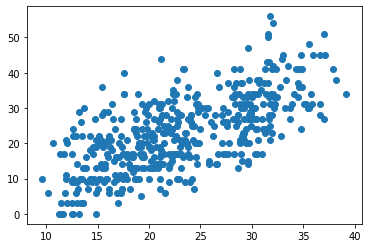

In [97]:
plt.scatter(preds_ts, f2_21_val)

In [ ]:
def make_ts_prediction_model_hpo(df, qbr, n_trees = 100):
    df = df.merge(qbr)
    df_1820 = df[df.Year != 2021]
    df_21   = df[df.Year == 2021]

    df_1820 = df_1820.drop(["Year", "Week", "Tm", "Opp", "Home/Away", "QB", "Opp_QB"], axis = 1) 
    df_21   = df_21.drop(["Year", "Week", "Tm", "Opp", "Home/Away", "QB", "Opp_QB"], axis = 1)
    df_1820_feat = df_1820.drop(["Score"], axis = 1)
    df_1820_val  = df_1820.Score

    df_21_feat = df_21.drop(["Score"], axis = 1)
    df_21_val = df_21.Score
    
    baseline_ts = [df_1820_val.mean()] * len(df_21_val)
    print(abs(df_21_val - baseline_ts).mean())
    
    rf_2_ts = skl_e.RandomForestRegressor(n_estimators = n_trees, 
                                          random_state = 212121,
                                         criterion = crit,
                                         max_depth = md,
                                         min_samples_split = mss,
                                         min_samples_leaf = msl,
                                         max_features = mf)
    rf_2_ts.fit(df_1820_feat, df_1820_val)

    preds_ts = rf_2_ts.predict(df_21_feat)
    errors_ts = abs(preds_ts - df_21_val)

    print(errors_ts.mean())
    print(scp_s.pearsonr(preds_ts, df_21_val))
    
    return(errors_ts.mean(), rf_2)

In [128]:
param_grid = {"bootstrap": [True, False],
         "max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
         "min_samples_leaf": [1, 2, 4, 10],
         "n_estimators": [100, 500]}

rf = skl_e.RandomForestRegressor()
grid_search = skl_ms.GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(f2_1820_feat, f2_1820_val)

Fitting 5 folds for each of 176 candidates, totalling 880 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'n_estimators': [100, 500]},
             verbose=2)

In [129]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [135]:
best_grid = grid_search.best_estimator_

best_preds = best_grid.predict(f2_21_feat)
print(abs(best_preds - f2_21_val).mean())


6.1946666666666665


In [140]:
import sklearn.decomposition as skl_d
import sklearn.preprocessing as skl_p

scaler = skl_p.StandardScaler()
x = skl_p.StandardScaler().fit_transform(f2_1820_feat)
x_test = skl_p.StandardScaler().fit_transform(f2_21_feat)

pca = skl_d.PCA(n_components = 0.95)
pca.fit(x)
reduced = pca.transform(x)
reduced_test = pca.transform(x_test)


In [142]:
rf_pca = skl_e.RandomForestRegressor(bootstrap = True, max_depth = 30, min_samples_leaf = 1, n_estimators = 100)

rf_pca.fit(reduced, f2_1820_val)

preds_ts = rf_pca.predict(reduced_test)
errors_ts = abs(preds_ts - f2_21_val)

print(errors_ts.mean())
print(scp_s.pearsonr(preds_ts, f2_21_val))
    

7.383145833333333
(0.5464199953950837, 1.0278188770718421e-38)


In [168]:
def make_ts_gb_prediction_model(df, qbr, md, n_trees = 100):
    df = df.merge(qbr)
    df_1820 = df[df.Year != 2021]
    df_21   = df[df.Year == 2021]

    df_1820 = df_1820.drop(["Year", "Week", "Tm", "Opp", "Home/Away", "QB", "Opp_QB"], axis = 1) 
    df_21   = df_21.drop(["Year", "Week", "Tm", "Opp", "Home/Away", "QB", "Opp_QB"], axis = 1)
    df_1820_feat = df_1820.drop(["Score"], axis = 1)
    df_1820_val  = df_1820.Score

    df_21_feat = df_21.drop(["Score"], axis = 1)
    df_21_val = df_21.Score
    
    baseline_ts = [df_1820_val.mean()] * len(df_21_val)
    print(abs(df_21_val - baseline_ts).mean())
    
    rf_2_ts = skl_e.GradientBoostingRegressor(random_state = 212121,
                                             n_estimators = 100,
                                             learning_rate = 0.05,
                                             max_depth = md)
    rf_2_ts.fit(df_1820_feat, df_1820_val)

    preds_ts = rf_2_ts.predict(df_21_feat)
    errors_ts = abs(preds_ts - df_21_val)

    print(errors_ts.mean())
    print(scp_s.pearsonr(preds_ts, df_21_val))

In [162]:
f2_dt = pd.read_csv(ws + f2)
make_ts_gb_prediction_model(f2_dt, qbr_2)

8.473812624007936
6.220694798962819
(0.6733154327330083, 1.1079857612807656e-64)


In [169]:
f2_dt = pd.read_csv(ws + f2)
make_ts_gb_prediction_model(f2_dt, qbr_2, md = 5)

8.473812624007936
6.216239480821639
(0.674177515868934, 6.65543266506716e-65)


In [170]:
f2_dt = pd.read_csv(ws + f2)
make_ts_gb_prediction_model(f2_dt, qbr_2, md = 3)

8.473812624007936
6.156744673140074
(0.6823361689963924, 4.9025256340114966e-67)


In [171]:
f2_dt = pd.read_csv(ws + f2)
make_ts_gb_prediction_model(f2_dt, qbr_2, md = 2)

8.473812624007936
6.135342210299249
(0.6884749792139011, 1.094309186794726e-68)


In [174]:
def make_ts_gb_prediction_model(df, qbr, md, mf, n_trees = 100):
    df = df.merge(qbr)
    df_1820 = df[df.Year != 2021]
    df_21   = df[df.Year == 2021]

    df_1820 = df_1820.drop(["Year", "Week", "Tm", "Opp", "Home/Away", "QB", "Opp_QB"], axis = 1) 
    df_21   = df_21.drop(["Year", "Week", "Tm", "Opp", "Home/Away", "QB", "Opp_QB"], axis = 1)
    df_1820_feat = df_1820.drop(["Score"], axis = 1)
    df_1820_val  = df_1820.Score

    df_21_feat = df_21.drop(["Score"], axis = 1)
    df_21_val = df_21.Score
    
    baseline_ts = [df_1820_val.mean()] * len(df_21_val)
    print(abs(df_21_val - baseline_ts).mean())
    
    rf_2_ts = skl_e.GradientBoostingRegressor(random_state = 212121,
                                             n_estimators = 100,
                                             learning_rate = 0.05,
                                             max_depth = md,
                                             max_features = mf)
    rf_2_ts.fit(df_1820_feat, df_1820_val)

    preds_ts = rf_2_ts.predict(df_21_feat)
    errors_ts = abs(preds_ts - df_21_val)

    print(errors_ts.mean())
    print(scp_s.pearsonr(preds_ts, df_21_val))

In [177]:
f2_dt = pd.read_csv(ws + f2)
make_ts_gb_prediction_model(f2_dt, qbr_2, md = 2, mf = 80)

8.473812624007936
6.143748786934943
(0.6901025167888286, 3.930323128963414e-69)


In [187]:
f2_dt = pd.read_csv(ws + f2)
make_ts_gb_prediction_model(f2_dt, qbr_2, md = 2, mf = None)

8.473812624007936
6.135342210299249
(0.6884749792139011, 1.094309186794726e-68)


In [214]:
def make_ts_gb_prediction_model(df, qbr, md, mf, mln, loss, n_trees = 100):
    df = df.merge(qbr)
    df_1820 = df[df.Year != 2021]
    df_21   = df[df.Year == 2021]

    df_1820 = df_1820.drop(["Year", "Week", "Tm", "Opp", "Home/Away", "QB", "Opp_QB"], axis = 1) 
    df_21   = df_21.drop(["Year", "Week", "Tm", "Opp", "Home/Away", "QB", "Opp_QB"], axis = 1)
    df_1820_feat = df_1820.drop(["Score"], axis = 1)
    df_1820_val  = df_1820.Score

    df_21_feat = df_21.drop(["Score"], axis = 1)
    df_21_val = df_21.Score
    
    baseline_ts = [df_1820_val.mean()] * len(df_21_val)
    print(abs(df_21_val - baseline_ts).mean())
    
    rf_2_ts = skl_e.GradientBoostingRegressor(random_state = 212121,
                                             n_estimators = 100,
                                             learning_rate = 0.05,
                                             max_depth = md,
                                             max_features = mf,
                                             max_leaf_nodes = mln,
                                             loss = loss)
    rf_2_ts.fit(df_1820_feat, df_1820_val)

    preds_ts = rf_2_ts.predict(df_21_feat)
    errors_ts = abs(preds_ts - df_21_val)

    print(errors_ts.mean())
    print(scp_s.pearsonr(preds_ts, df_21_val))

In [218]:
f2_dt = pd.read_csv(ws + f2)
make_ts_gb_prediction_model(f2_dt, qbr_2, mf = None, md = 2, mln = 20, loss = "huber", n_trees = 1000)

8.473812624007936
6.08886091150635
(0.6931851984215414, 5.546015674937004e-70)


In [228]:
def make_ts_gb_prediction_model(df, qbr, md, mf, mln, loss, a, n_trees = 100):
    df = df.merge(qbr)
    df_1820 = df[df.Year != 2021]
    df_21   = df[df.Year == 2021]

    df_1820 = df_1820.drop(["Year", "Week", "Tm", "Opp", "Home/Away", "QB", "Opp_QB"], axis = 1) 
    df_21   = df_21.drop(["Year", "Week", "Tm", "Opp", "Home/Away", "QB", "Opp_QB"], axis = 1)
    df_1820_feat = df_1820.drop(["Score"], axis = 1)
    df_1820_val  = df_1820.Score

    df_21_feat = df_21.drop(["Score"], axis = 1)
    df_21_val = df_21.Score
    
    baseline_ts = [df_1820_val.mean()] * len(df_21_val)
    print(abs(df_21_val - baseline_ts).mean())
    
    rf_2_ts = skl_e.GradientBoostingRegressor(random_state = 212121,
                                             n_estimators = 100,
                                             learning_rate = 0.05,
                                             max_depth = md,
                                             max_features = mf,
                                             max_leaf_nodes = mln,
                                             loss = loss,
                                             alpha = a)
    rf_2_ts.fit(df_1820_feat, df_1820_val)

    preds_ts = rf_2_ts.predict(df_21_feat)
    errors_ts = abs(preds_ts - df_21_val)

    print(errors_ts.mean())
    print(scp_s.pearsonr(preds_ts, df_21_val))

In [237]:
f2_dt = pd.read_csv(ws + f2)
make_ts_gb_prediction_model(f2_dt, qbr_2, mf = None, md = 2, mln = 20, loss = "huber", a = 0.84, n_trees = 1000)

8.473812624007936
6.076871817659377
(0.6931724573919491, 5.5913694252115264e-70)


In [241]:
def make_ts_gb_prediction_model(df, qbr, md, mf, mln, loss, a, mwfl, n_trees = 100):
    df = df.merge(qbr)
    df_1820 = df[df.Year != 2021]
    df_21   = df[df.Year == 2021]

    df_1820 = df_1820.drop(["Year", "Week", "Tm", "Opp", "Home/Away", "QB", "Opp_QB"], axis = 1) 
    df_21   = df_21.drop(["Year", "Week", "Tm", "Opp", "Home/Away", "QB", "Opp_QB"], axis = 1)
    df_1820_feat = df_1820.drop(["Score"], axis = 1)
    df_1820_val  = df_1820.Score

    df_21_feat = df_21.drop(["Score"], axis = 1)
    df_21_val = df_21.Score
    
    baseline_ts = [df_1820_val.mean()] * len(df_21_val)
    print(abs(df_21_val - baseline_ts).mean())
    
    rf_2_ts = skl_e.GradientBoostingRegressor(random_state = 212121,
                                             n_estimators = 100,
                                             learning_rate = 0.05,
                                             max_depth = md,
                                             max_features = mf,
                                             max_leaf_nodes = mln,
                                             loss = loss,
                                             alpha = a,
                                             min_weight_fraction_leaf = mwfl)
    rf_2_ts.fit(df_1820_feat, df_1820_val)

    preds_ts = rf_2_ts.predict(df_21_feat)
    errors_ts = abs(preds_ts - df_21_val)

    print(errors_ts.mean())
    print(scp_s.pearsonr(preds_ts, df_21_val))

In [252]:
f2_dt = pd.read_csv(ws + f2)
make_ts_gb_prediction_model(f2_dt, qbr_2, mf = None, md = 2, mln = 20, loss = "huber", mwfl = 0.00, a = 0.84, n_trees = 1000)

8.473812624007936
6.076871817659377
(0.6931724573919491, 5.5913694252115264e-70)


In [253]:
def make_ts_gb_prediction_model(df, qbr, md, mf, mln, loss, a, msl, mwfl, n_trees = 100):
    df = df.merge(qbr)
    df_1820 = df[df.Year != 2021]
    df_21   = df[df.Year == 2021]

    df_1820 = df_1820.drop(["Year", "Week", "Tm", "Opp", "Home/Away", "QB", "Opp_QB"], axis = 1) 
    df_21   = df_21.drop(["Year", "Week", "Tm", "Opp", "Home/Away", "QB", "Opp_QB"], axis = 1)
    df_1820_feat = df_1820.drop(["Score"], axis = 1)
    df_1820_val  = df_1820.Score

    df_21_feat = df_21.drop(["Score"], axis = 1)
    df_21_val = df_21.Score
    
    baseline_ts = [df_1820_val.mean()] * len(df_21_val)
    print(abs(df_21_val - baseline_ts).mean())
    
    rf_2_ts = skl_e.GradientBoostingRegressor(random_state = 212121,
                                             n_estimators = 100,
                                             learning_rate = 0.05,
                                             max_depth = md,
                                             max_features = mf,
                                             max_leaf_nodes = mln,
                                             loss = loss,
                                             alpha = a,
                                             min_weight_fraction_leaf = mwfl,
                                             min_samples_leaf = msl)
    rf_2_ts.fit(df_1820_feat, df_1820_val)

    preds_ts = rf_2_ts.predict(df_21_feat)
    errors_ts = abs(preds_ts - df_21_val)

    print(errors_ts.mean())
    print(scp_s.pearsonr(preds_ts, df_21_val))

In [257]:
f2_dt = pd.read_csv(ws + f2)
make_ts_gb_prediction_model(f2_dt, qbr_2, mf = None, md = 2, mln = 20, loss = "huber",
                            mwfl = 0.00, a = 0.84, msl = 0.09, n_trees = 1000)

8.473812624007936
6.046252843572576
(0.6937844307408615, 3.779345547619076e-70)


In [267]:
f2_dt = pd.read_csv(ws + f2)
make_ts_gb_prediction_model(f2_dt, qbr_2, mf = None, md = 2, mln = 20, loss = "huber",
                            mwfl = 0.00, a = 0.84, msl = 0.4, n_trees = 1000)

8.473812624007936
6.422005569329612
(0.6373196176281762, 4.5759211207227975e-56)


In [ ]:
# Get opponent QBR
oqbr_2 = get_two_week_average(all_df[["Year", "Week", "Tm", "Opp_QB", "Opp_Avg_Passer_Rating"]])

In [271]:
for col in all_df.columns:
    if "Opp" in col:
        print(col)

Opp
Opp_Score


In [269]:
all_df["Opp_Avg_Passer_Rating"]

KeyError: 'Opp_Avg_Passer_Rating'